## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define the domain

In [ ]:
L = 1.0  # Length of the porous medium
nx = 101  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points

## Define the initial and boundary conditions

In [ ]:
So = np.zeros(nx)
Sw = np.ones(nx)
Sw[0] = 0.5  # Inlet boundary condition
Sw[-1] = 1.0  # Outlet boundary condition

## Define the model parameters

In [ ]:
phi = 0.2  # Porosity
k = 1.0  # Permeability
Sor = 0.2  # Residual oil saturation
Sg = 0.3  # Gas saturation
krw0 = 0.4  # Initial water relative permeability
kro0 = 1.0  # Initial oil relative permeability
nw = 2.0  # Water exponent
no = 2.0  # Oil exponent

## Define the time steps and time span

In [ ]:
dt = 0.001  # Time step
t_max = 0.30  # Maximum simulation time
t = np.arange(0, t_max + dt, dt)  # Time array

## Solve the Buckley-Leverett equation numerically using the finite difference method

<ipython-input-108-4b2e2932e663>:9: RuntimeWarning: overflow encountered in multiply
  dSw_dt = phi * (Sor - Sw) * (qw + qo) / dx
<ipython-input-108-4b2e2932e663>:5: RuntimeWarning: overflow encountered in square
  krw = krw0 * ((Sw - Sor) / (1 - Sor - Sg))**nw
<ipython-input-108-4b2e2932e663>:6: RuntimeWarning: overflow encountered in square
  kro = kro0 * ((1 - Sw - Sg) / (1 - Sor - Sg))**no
<ipython-input-108-4b2e2932e663>:7: RuntimeWarning: overflow encountered in multiply
  qw = k * krw * dSw_dx
<ipython-input-108-4b2e2932e663>:8: RuntimeWarning: overflow encountered in multiply
  qo = k * kro * (1 - Sw - Sg) * dSw_dx
<ipython-input-108-4b2e2932e663>:9: RuntimeWarning: invalid value encountered in add
  dSw_dt = phi * (Sor - Sw) * (qw + qo) / dx


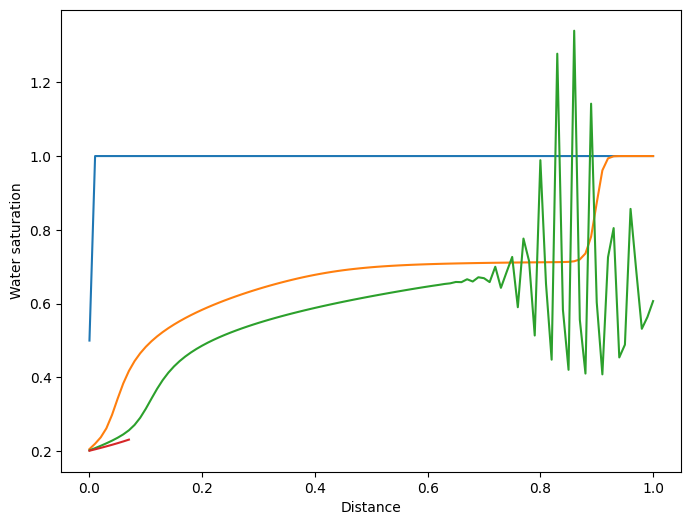

In [ ]:
Sw_hist = np.zeros((len(t), nx))  # Array to store the history of Sw
Sw_hist[0, :] = Sw  # Store the initial condition
for i in range(1, len(t)):
    dSw_dx = np.gradient(Sw) / dx
    krw = krw0 * ((Sw - Sor) / (1 - Sor - Sg))**nw
    kro = kro0 * ((1 - Sw - Sg) / (1 - Sor - Sg))**no
    qw = k * krw * dSw_dx
    qo = k * kro * (1 - Sw - Sg) * dSw_dx
    dSw_dt = phi * (Sor - Sw) * (qw + qo) / dx
    Sw += dSw_dt * dt
    Sw_hist[i, :] = Sw

# Plot the results
plt.figure(figsize=(8, 6))
for i in range(0, len(t), 100):
    plt.plot(x, Sw_hist[i, :], label=f"t={t[i]:.3f}")
plt.xlabel("Distance")
plt.ylabel("Water saturation")
# plt.legend(loc="upper right")
plt.show()

In [ ]:
Sw_hist

array([[0.5       , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.4472    , 0.6336    , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.43223419, 0.5612159 , 0.73150208, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.2015002 , 0.20534356, 0.20930327, ...,        nan,        nan,
               nan],
       [0.20149448, 0.20532337, 0.20926781, ...,        nan,        nan,
               nan],
       [0.20148881, 0.20530333, 0.20923261, ...,        nan,        nan,
               nan]])

## Store the data in a Pandas DataFrame

In [ ]:
df = pd.DataFrame(Sw_hist, index=t, columns=x)
df.index.name = "Time"
df.columns.name = "Distance"

In [ ]:
df.head()

Distance,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
Time,,,,,,,,,,,,,,,,,,,,,
0.000,0.500000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.001,0.447200,0.633600,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.002,0.432234,0.561216,0.731502,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.003,0.422464,0.537493,0.626120,0.803245,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.004,0.414035,0.523787,0.593038,0.672917,0.855818,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
Sw_hist.ravel()

array([0.5, 1. , 1. , ..., nan, nan, nan])

In [ ]:
# Store the data in a Pandas DataFrame
df = pd.DataFrame({
    "Sw": Sw_hist.ravel(),
    "Time": np.repeat(t, nx),
    "Distance": np.tile(x, len(t)),
})
df = df.set_index(["Time", "Distance"])


In [ ]:
df.head()

Sw
Time Distance     
0.0  0.00      0.5
     0.01      1.0
     0.02      1.0
     0.03      1.0
     0.04      1.0